# Imbalanced Classification - SMOTE (Synthetic Minority Oversampling TEchnique)

## 0. Introduction

This notebook contains:
  1. SMOTE for balancing data
  2. SMOTE for Classification
  3. SMOTE with Selective Synthetic Sample Generation
    1. Borderline SMOTE
    2. Borderline SMOTE SVM
    3. Adaptive Synthetic Sampling (ADASYN)

## 1. SMOTE for balancing data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification

Counter({0: 9900, 1: 100})


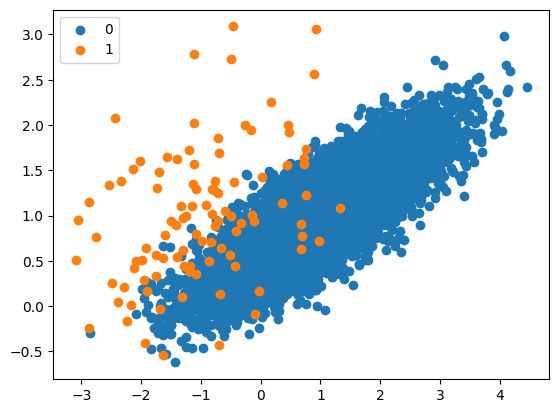

In [2]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(y)
print(counter)
for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [3]:
from imblearn.over_sampling import SMOTE

Counter({0: 9900, 1: 100})


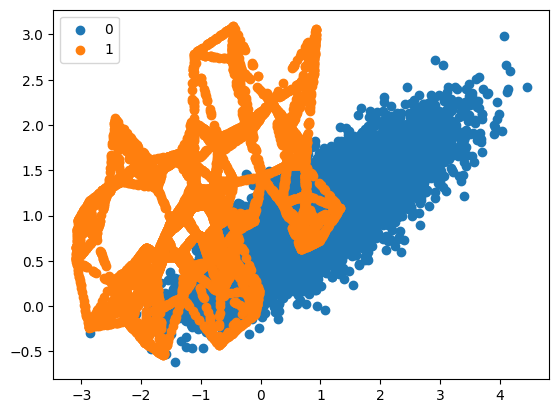

In [4]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(y)
print(counter)
smote = SMOTE()
X, y = smote.fit_resample(X, y)
for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [5]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

Counter({0: 9900, 1: 100})


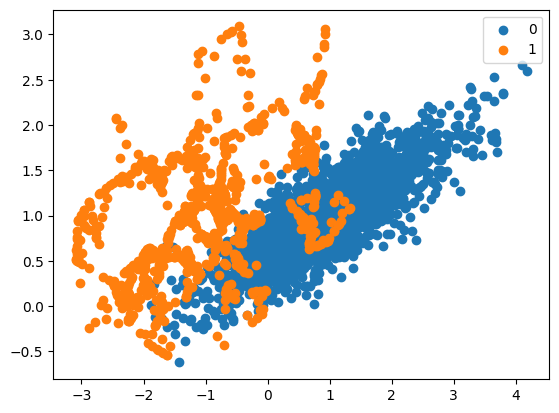

In [6]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(y)
print(counter)
over_sampler = SMOTE(sampling_strategy=0.1)
under_sampler = RandomUnderSampler(sampling_strategy=0.5)
pipeline = Pipeline(steps=[
    ('o', over_sampler),
    ('u', under_sampler)
])
X, y = pipeline.fit_resample(X, y)
for label, _ in counter.items():
  row_ix = np.where(y == label)[0]
  plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

## 2. SMOTE for Classification

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

In [13]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[
    ('o', over),
    ('u', under),
    ('m', model)
])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print(f"Mean ROC AUC: {np.mean(n_scores):.2f} ({np.std(n_scores):.2f})")

Mean ROC AUC: 0.84 (0.07)


In [12]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for k in k_values:
  over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
  under = RandomUnderSampler(sampling_strategy=0.5)
  model = DecisionTreeClassifier()
  pipeline = Pipeline(steps=[
      ('o', over),
      ('u', under),
      ('m', model)
  ])
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
  n_scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
  print(f"k={k}, Mean ROC AUC: {np.mean(n_scores):.3f} ({np.std(n_scores):.2f})")

k=1, Mean ROC AUC: 0.840 (0.07)
k=2, Mean ROC AUC: 0.832 (0.07)
k=3, Mean ROC AUC: 0.846 (0.07)
k=4, Mean ROC AUC: 0.840 (0.07)
k=5, Mean ROC AUC: 0.840 (0.07)
k=6, Mean ROC AUC: 0.834 (0.07)
k=7, Mean ROC AUC: 0.853 (0.05)
k=8, Mean ROC AUC: 0.847 (0.06)
k=9, Mean ROC AUC: 0.852 (0.07)
k=10, Mean ROC AUC: 0.848 (0.06)
